In [31]:
import pyprojroot

def make_dir_function(dir_name):
    def dir_function(*args):
        return pyprojroot.here().joinpath(dir_name, *args)

    return dir_function

In [32]:
data_dir = make_dir_function("Data")

In [33]:
data_dir("raw", "songs_normalize.csv")

WindowsPath('j:/DOCUEMENTOS/PROYECTOS PERSONALES/SPOTIFY/project/Data/raw/songs_normalize.csv')

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.subplots as sp

In [35]:
df=pd.read_csv(data_dir("raw", "songs_normalize.csv"))

In [36]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [38]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [39]:
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.shape

(1941, 18)

# Content

- **artist**: Name of the Artist.

- **song**: Name of the Track.

- **duration_ms**: Duration of the track in milliseconds.

- **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

- **year**: Release Year of the track.

- **popularity**: The higher the value the more popular the song is.

- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **genre**: Genre of the track

In [42]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


C:\Users\user\AppData\Local\Temp\ipykernel_12468\3268483839.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



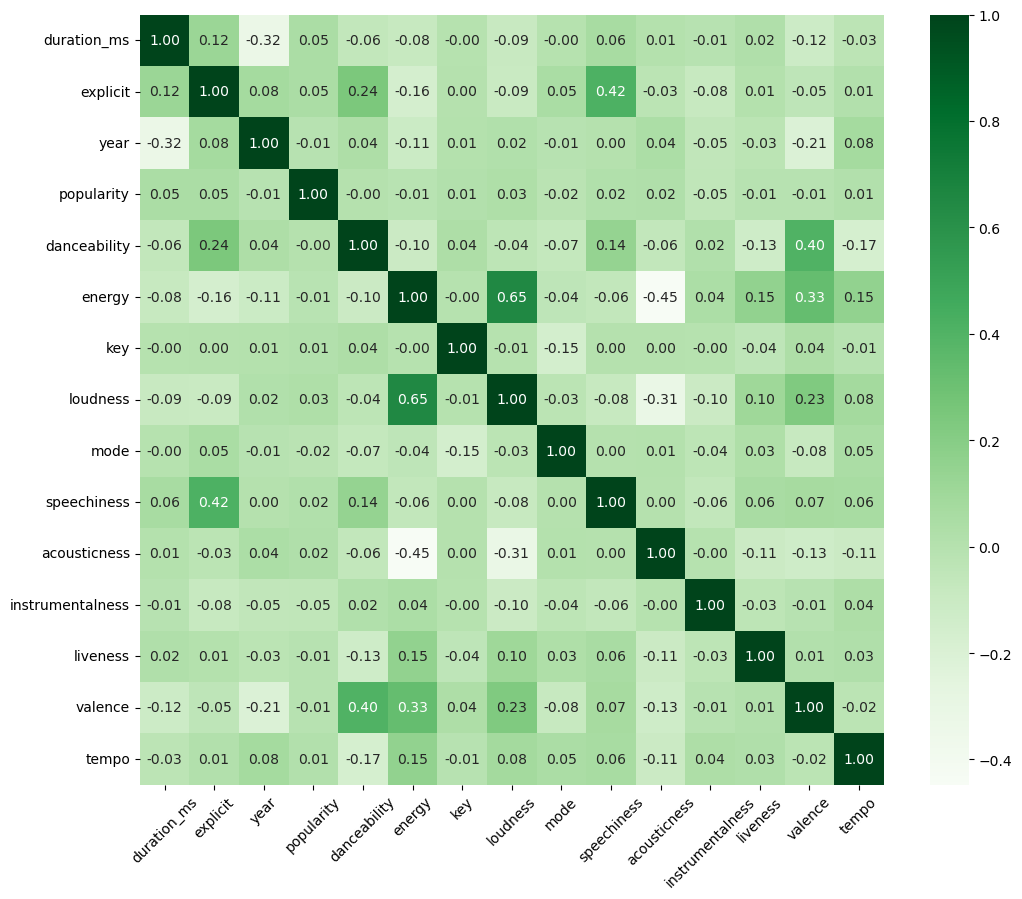

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(12,10))
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap=cmap)
plt.xticks(rotation=45)
plt.show()
plt.savefig('../reports/figures/Matriz_de_correlaciónes.png')

In [44]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

ruta = '../reports/figures/Matriz_de_distribuciones.png'
pio.write_image(fig, ruta)

In [45]:
fig=px.line(
    df.groupby('year',as_index=False)
    .count()
    .sort_values(by='song',ascending=False)
    .sort_values(by='year'),
    x='year',
    y='song',
    markers=True,
    template='plotly_dark',
    labels={'song':'Total songs'},
    color_discrete_sequence=['green'],
    title='<b>Year by Year Songs collection'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()

pio.write_image(fig, '../reports/figures/Year_by_Year_Songs_collection.png')

In [46]:
fig=px.bar(
    df.groupby('genre',as_index=False)
    .count()
    .sort_values(by='song',ascending=False),
    x='genre',
    y='song',
    template='plotly_dark',
    labels={'song':'Total songs'},
    color_discrete_sequence=['green'],
    title='<b>Total songs based on genres</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Total_songs_based_on_genres.png')

In [47]:
fig=px.bar(
    df.groupby('genre',as_index=False)
    .sum()
    .sort_values(by='popularity',ascending=False),
    x='genre',
    y='popularity',
    template='plotly_dark',
    labels={'popularity':'Total popularity'},
    color_discrete_sequence=['green'],
    title='<b>Popular genres based on popularity</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Popular_genres_based_on_popularity.png')

C:\Users\user\AppData\Local\Temp\ipykernel_12468\1964104766.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [48]:
fig=px.bar(
    df.groupby('artist',as_index=False)
    .count()
    .sort_values(by='song',ascending=False)
    .head(50),
    x='artist',
    y='song',
    template='plotly_dark',
    labels={'song':'Total song'},
    color_discrete_sequence=['green'],
    text='song',
    title='<b> List of Songs Recorded by Each Singer</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/List_of_Songs_Recorded_by_Each_Singer.png')

In [49]:
fig=px.bar(
    df.groupby('artist',as_index=False)
    .sum()
    .sort_values(by='popularity',ascending=False)
    .head(20),
    x='artist',
    y='popularity',
    template='plotly_dark',
    labels={'popularity':'Total popularity'},
    color_discrete_sequence=['green'],
    text='popularity',
    title='<b>Top 20 Popular Singers</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Top_20_Popular_Singers.png')

C:\Users\user\AppData\Local\Temp\ipykernel_12468\3637771911.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [50]:
fig=px.bar(
    df.sort_values(by='popularity',ascending=False)
    .head(10),
    x='popularity',
    y='song',
    template='plotly_dark',
    color='key',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'popularity':'Total popularity'},
    color_discrete_sequence=['green'],
    text='popularity',
    title='<b>Top 10 Popular song in Spotify with its key</b>',
    orientation='h'
    )
fig.update_layout(
    hovermode='y',
    title_x=0.5,
    yaxis=dict(autorange="reversed"))

fig.show()

pio.write_image(fig, '../reports/figures/Top_10_Popular_song_in_Spotify_with_its_key.png')

In [51]:
fig=px.pie(
    df.groupby('explicit', as_index=False)
    .count()
    .sort_values(by='song',ascending=False),
    names='explicit',
    values='song',
    template='plotly_dark',
    labels={'song':'Total songs'},
    hole=.6,
    color_discrete_sequence=['green','#800000'],
    title='<b>Songs having explicit content</b>',
    )
fig.update_layout(
    title_x=0.5
)

fig.show()

pio.write_image(fig, '../reports/figures/Songs_having_explicit_content.png')

In [52]:
fig=px.line(
    df[df['explicit']==True]
    .groupby('year',as_index=False)
    .count()
    .sort_values(by='song',ascending=False)
    .sort_values(by='year'),
    x='year',
    y='song',
    markers=True,
    template='plotly_dark',
    labels={'song':'Total songs'},
    color_discrete_sequence=['#800000'],
    title='<b>Yearwise explicit content songs'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()

pio.write_image(fig, '../reports/figures/Yearwise_explicit_content_songs.png')

In [53]:
fig = px.box(
    df,
    x='explicit',
    y='popularity',
    color='explicit',
    template='plotly_dark',
    color_discrete_sequence=['cyan','magenta'],
    title='<b>popularity based on explicit content'
    )
fig.show()
pio.write_image(fig, '../reports/figures/popularity_based_on_explicit_content.png')

**0 = C/B♯ | 1 = C♯/D♭ | 2 = D | 3 = D♯/E♭ | 4 = E/F♭ | 5 = F/E♯ | 6 = F♯/G♭ | 7 = G | 8 = G♯/A♭ | 9 = A | 10 = A♯/B♭ | 11 = B/C♭**

In [54]:
fig = px.box(
    df.sort_values(by='popularity',ascending=False),
    x='key',
    y='popularity',
    color='key',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='<b>Popularity based on Key'
    )
fig.show()
pio.write_image(fig, '../reports/figures/Popularity_based_on_Key.png')

In [55]:
fig = px.box(
    df.sort_values(by='popularity',ascending=False),
    y='key',
    x='genre',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='<b>Key-based genre popularity'
    )
fig.show()
pio.write_image(fig, '../reports/figures/Key-based_genre_popularity.png')

In [56]:
fig=px.bar(
    df.groupby('key',as_index=False)
    .count()
    .sort_values(by='popularity',ascending=False)
    .head(50),
    x='key',
    y='artist',
    template='plotly_dark',
    color='key',
    labels={'popularity':'Total popularity'},
    color_discrete_sequence=['cyan'],
    title='<b>Key most used by artists</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Key_most_used_by_artists.png')

In [57]:
fig=px.bar(
    df.groupby('key',as_index=False)
    .sum()
    .sort_values(by='key',ascending=False)
    .sort_values(by='popularity'),
    x='key',
    y='popularity',
    color='key',
    template='plotly_dark',
    labels={'popularity':'Total popularity'},
    color_discrete_sequence=['cyan'],
    title='<b>The most popular key</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/The_most_popular_key.png')

C:\Users\user\AppData\Local\Temp\ipykernel_12468\1230171678.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [58]:
fig=px.scatter(
    df,
    x='tempo',
    y='danceability',
    color='energy',
    template='plotly_dark',
    title='<b>Tempo Versus danceability</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Tempo_Versus_danceability.png')

In [59]:
fig=px.scatter(
    df,
    x='energy',
    y='danceability',
    color='danceability',
    template='plotly_dark',
    title='<b>Energy Versus Danceability</b>'
    )
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Tempo_Versus_danceability.png')

In [60]:
fig=px.scatter(
    df,
    x='energy',
    y='loudness',
    color='loudness',
    template='plotly_dark',
    title='<b>Energy versus Loudness correlation</b>'
    )

fig.update_layout(hovermode='x',title_x=0.5)
fig.show()
pio.write_image(fig, '../reports/figures/Energy_versus_Loudness_correlation.png')

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x = df['energy'].values.reshape(-1,1)
y = df['loudness'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)



LinearRegression()

In [62]:
LinearRegression()

LinearRegression()

In [63]:
fig = px.scatter(
    df,
    x=x_std.flatten(),
    y=y_std.flatten(),
    opacity=0.2,
    template='plotly_dark',
    title='<b>Energy versus Loudness & Linear Regression</b>'
)

fig.add_trace(go.Scatter(
    x=x_std.flatten(),
    y=slr.predict(x_std).flatten(),
    mode='lines',
    name='Linear Regression',
    line=dict(color='red', width=2.5)  # Ajustar el grosor de la línea aquí
))

fig.update_layout(
    xaxis=dict(title='Energy'),
    yaxis=dict(title='Loudness'),
    hovermode='x', 
    title_x=0.5)
fig.show()

pio.write_image(fig, '../reports/figures/Energy_versus_Loudness_&_Linear_Regression.png')